## p1 a)

In [27]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def convolucion(imagen, mascara):
    # Aplicar la convolución entre la imagen y la máscara
    imagen_convolucionada = cv2.filter2D(imagen, -1, mascara)
    return imagen_convolucionada

def calcular_espectro(imagen):
    # Calcular la Transformada de Fourier
    f = np.fft.fft2(imagen)
    fshift = np.fft.fftshift(f)
    magnitud = np.log(np.abs(fshift))
    return magnitud


## p1 b)

In [28]:
#Imagen

import requests
from PIL import Image
from io import BytesIO

# URL de la imagen
url = "https://github.com/X4ero26/Robotica/raw/main/calle1.png"

# Descargar la imagen
response = requests.get(url)
image_bytes = BytesIO(response.content)

# Abrir la imagen con PIL
imagen_pil = Image.open(image_bytes)

# Convertir la imagen PIL a un arreglo numpy
imagen_cv2 = cv2.cvtColor(np.array(imagen_pil), cv2.COLOR_RGB2BGR)

imagen_gris = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2GRAY)

In [29]:
# Máscaras
mascara_pasa_bajos = (1/9)* np.ones((3,3), dtype=np.float32)
mascara_pasa_bajos_unidimensional = (1/3)* np.array([1,1,1], dtype=np.float32)

In [30]:
# Filtros
imagen_pasa_bajos_recto = convolucion(imagen_gris, mascara_pasa_bajos)
imagen_unidimensional   = convolucion(imagen_gris, mascara_pasa_bajos_unidimensional)
imagen_gaussiana  = cv2.GaussianBlur(imagen_gris, (5,5), 1)

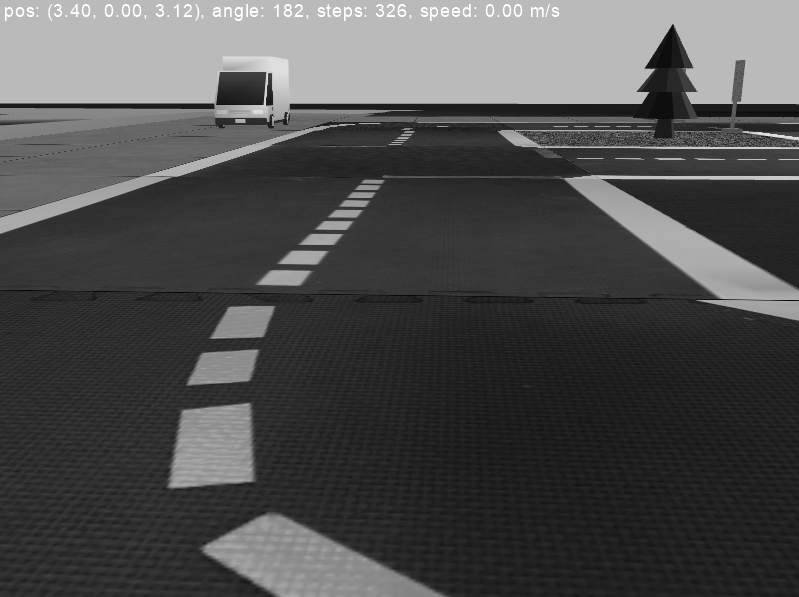

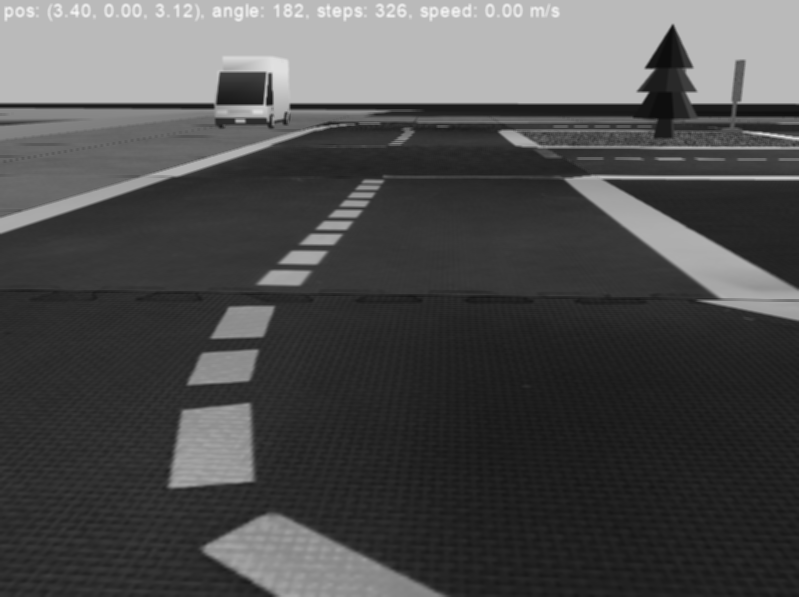

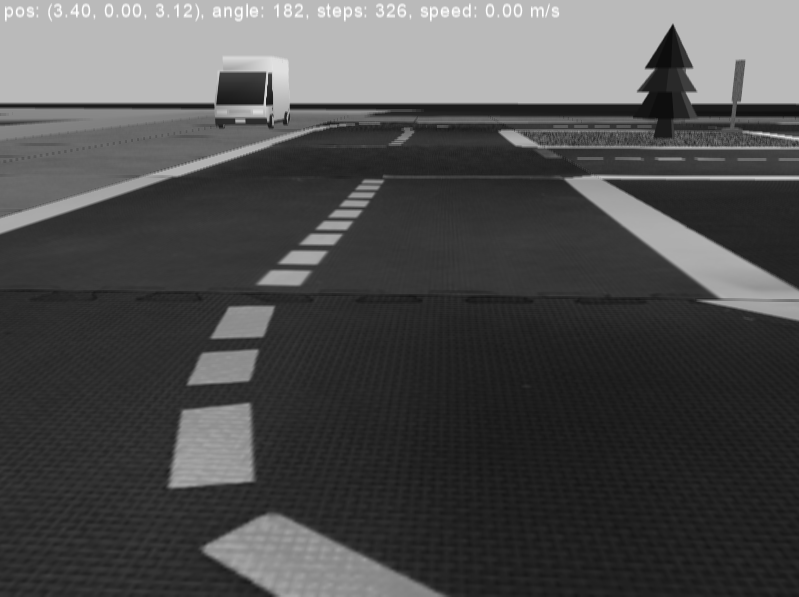

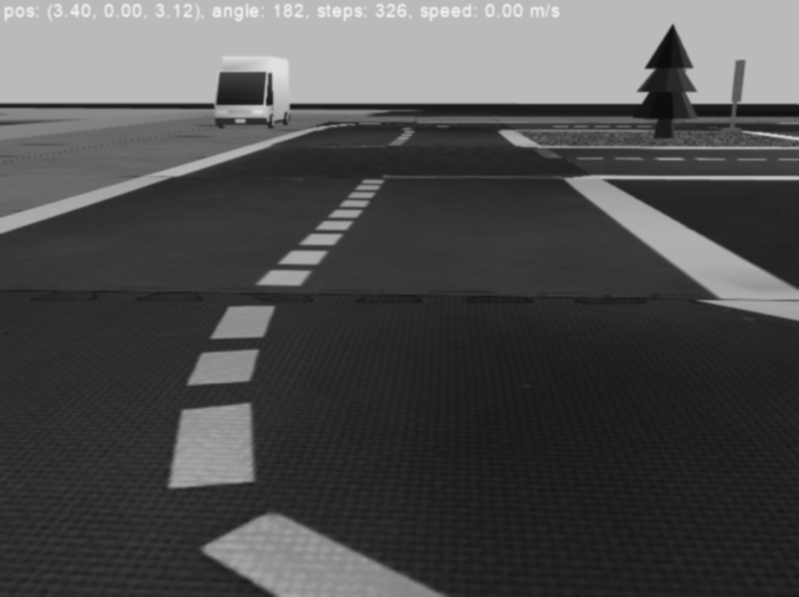

In [31]:
# Imagenes resultantes
cv2_imshow(imagen_gris)
cv2_imshow(imagen_pasa_bajos_recto)
cv2_imshow(imagen_unidimensional)
cv2_imshow(imagen_gaussiana)

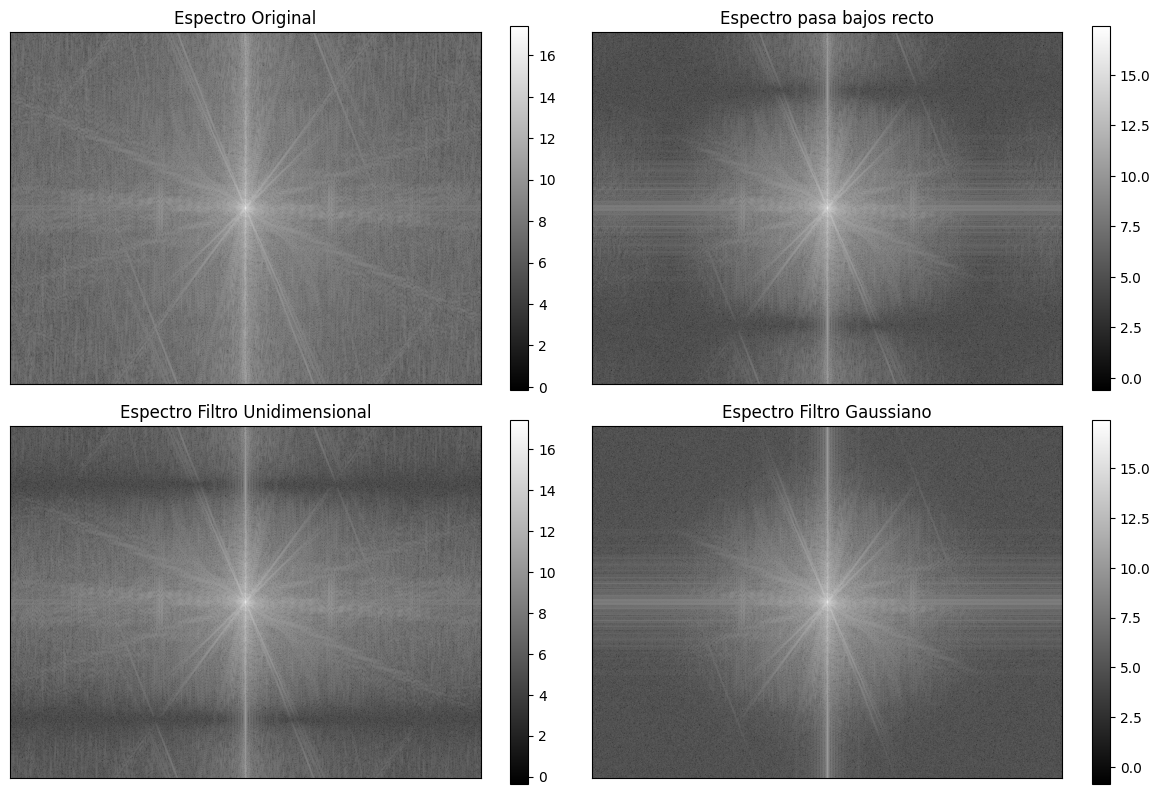

In [32]:
# Calcular el espectro de frecuencia de las imágenes originales y filtradas
espectro_original = [calcular_espectro(imagen_gris), 'Espectro Original']
espectro_media = [calcular_espectro(imagen_pasa_bajos_recto), 'Espectro pasa bajos recto']
espectro_unidimensional = [calcular_espectro(imagen_unidimensional), 'Espectro Filtro Unidimensional']
espectro_gaussiana = [calcular_espectro(imagen_gaussiana), 'Espectro Filtro Gaussiano']

# Graficar espectros
plt.figure(figsize=(12, 8))
plt.subplot(221), plt.imshow(espectro_original[0], cmap='gray')
plt.title(espectro_original[1]), plt.xticks([]), plt.yticks([])
plt.colorbar()  # Añadir barra lateral para el espectro
plt.subplot(222), plt.imshow(espectro_media[0], cmap='gray')
plt.title(espectro_media[1]), plt.xticks([]), plt.yticks([])
plt.colorbar()  # Añadir barra lateral para el espectro
plt.subplot(223), plt.imshow(espectro_unidimensional[0], cmap='gray')
plt.title(espectro_unidimensional[1]), plt.xticks([]), plt.yticks([])
plt.colorbar()  # Añadir barra lateral para el espectro
plt.subplot(224), plt.imshow(espectro_gaussiana[0], cmap='gray')
plt.title(espectro_gaussiana[1]), plt.xticks([]), plt.yticks([])
plt.colorbar()  # Añadir barra lateral para el espectro
plt.tight_layout()
plt.show()

## p1 c)

In [33]:
# Definir la máscara pasa altos prewitt vertical
mascara_pasa_altos_prewitt_vertical = (1/9) * np.array([[-1, 0, 1],
                                                        [-1, 0, 1],
                                                        [-1, 0, 1]])

# Definir la máscara pasa altos prewitt horizontal
mascara_pasa_altos_prewitt_horizontal = (1/9) * np.array([[-1, -1, -1],
                                                          [0, 0, 0],
                                                          [1, 1, 1]])

# Definir la máscara pasa altos laplaciano
mascara_pasa_altos_laplaciano = (1/9) * np.array([[-1, -1, -1],
                                                  [-1, 8, -1],
                                                  [-1, -1, -1]])


In [34]:
# Filtros
imagen_pasa_altos_prewitt_vertical = convolucion(imagen_gris, mascara_pasa_altos_prewitt_vertical)
imagen_pasa_altos_prewitt_horizontal = convolucion(imagen_gris, mascara_pasa_altos_prewitt_horizontal)
imagen_pasa_altos_prewitt_laplaciano = convolucion(imagen_gris, mascara_pasa_altos_laplaciano)

imagen_gaussiana = cv2.GaussianBlur(imagen_gris, (5,5), 1)
imagen_pasa_altos_prewitt_laplaciano_gaussiana = cv2.Laplacian(imagen_gaussiana, cv2.CV_64F, ksize = 5)

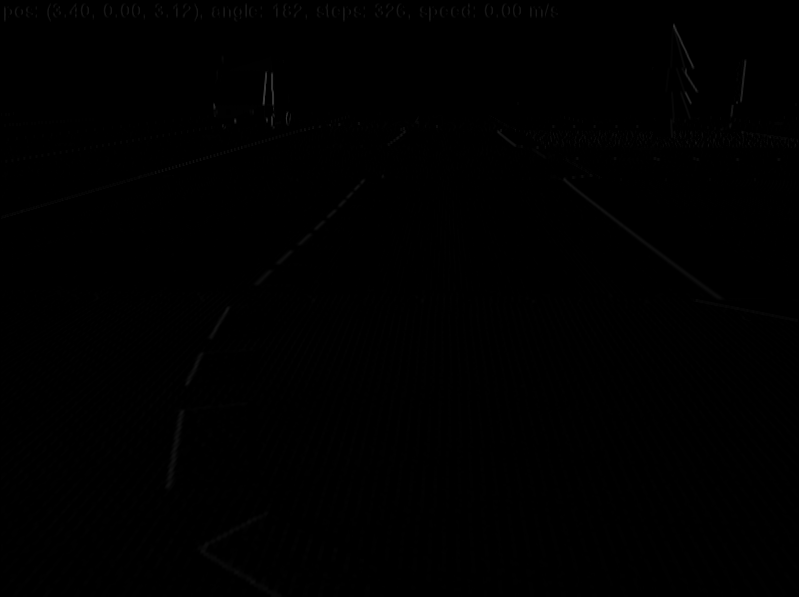

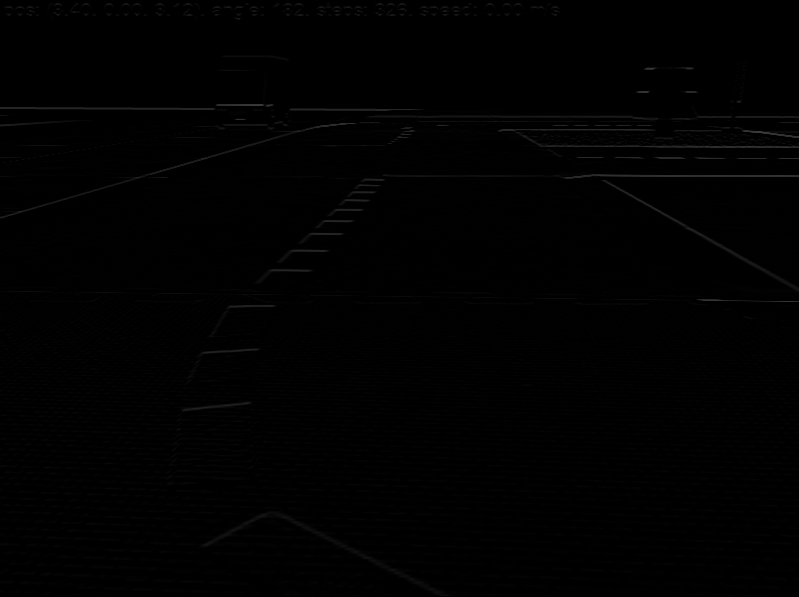

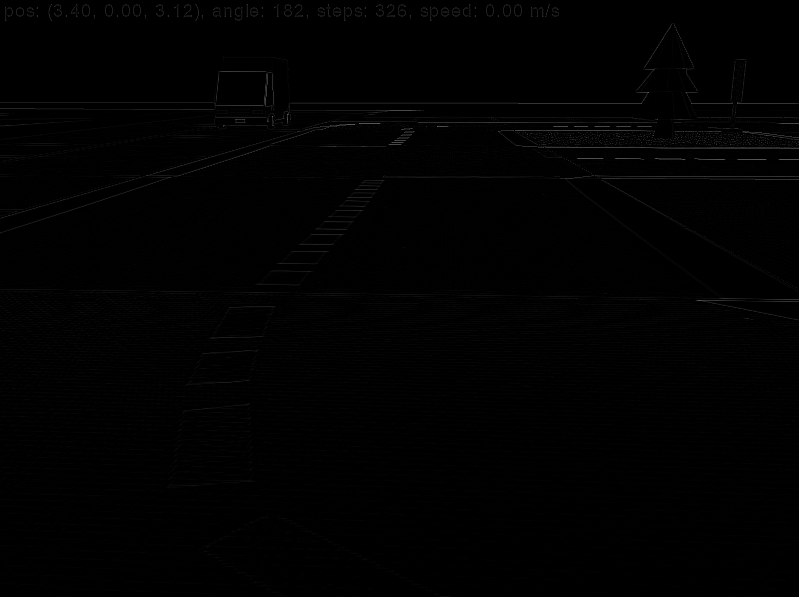

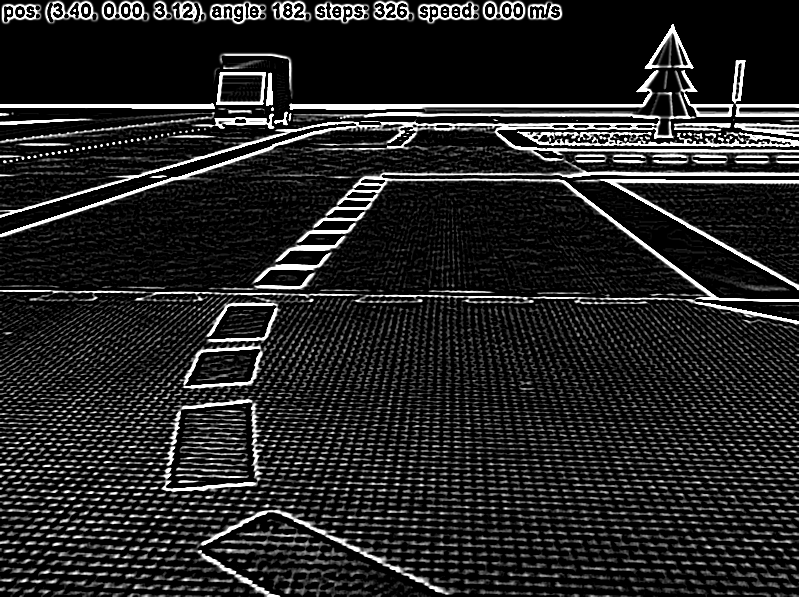

In [35]:
# Imagenes resultantes
cv2_imshow(imagen_pasa_altos_prewitt_vertical)
cv2_imshow(imagen_pasa_altos_prewitt_horizontal)
cv2_imshow(imagen_pasa_altos_prewitt_laplaciano)
cv2_imshow(imagen_pasa_altos_prewitt_laplaciano_gaussiana)

In [36]:
# Calcular el espectro de frecuencia de las imágenes originales y filtradas
espectro_original = [calcular_espectro(imagen_gris), 'Espectro Original']
espectro_prewitt_vertical = [calcular_espectro(imagen_pasa_altos_prewitt_vertical), 'Filtro pasa-altos Prewitt vertical']
espectro_prewitt_horizontal = [calcular_espectro(imagen_pasa_altos_prewitt_horizontal), ' Filtro pasa-altos Prewitt horizontal']
espectro_laplaciano = [calcular_espectro(imagen_pasa_altos_prewitt_laplaciano), ' Filtro laplaciano de 3x3']
espectro_laplaciano_gaussiana = [calcular_espectro(imagen_pasa_altos_prewitt_laplaciano), ' Filtro laplaciano de gaussiana de 5x5']



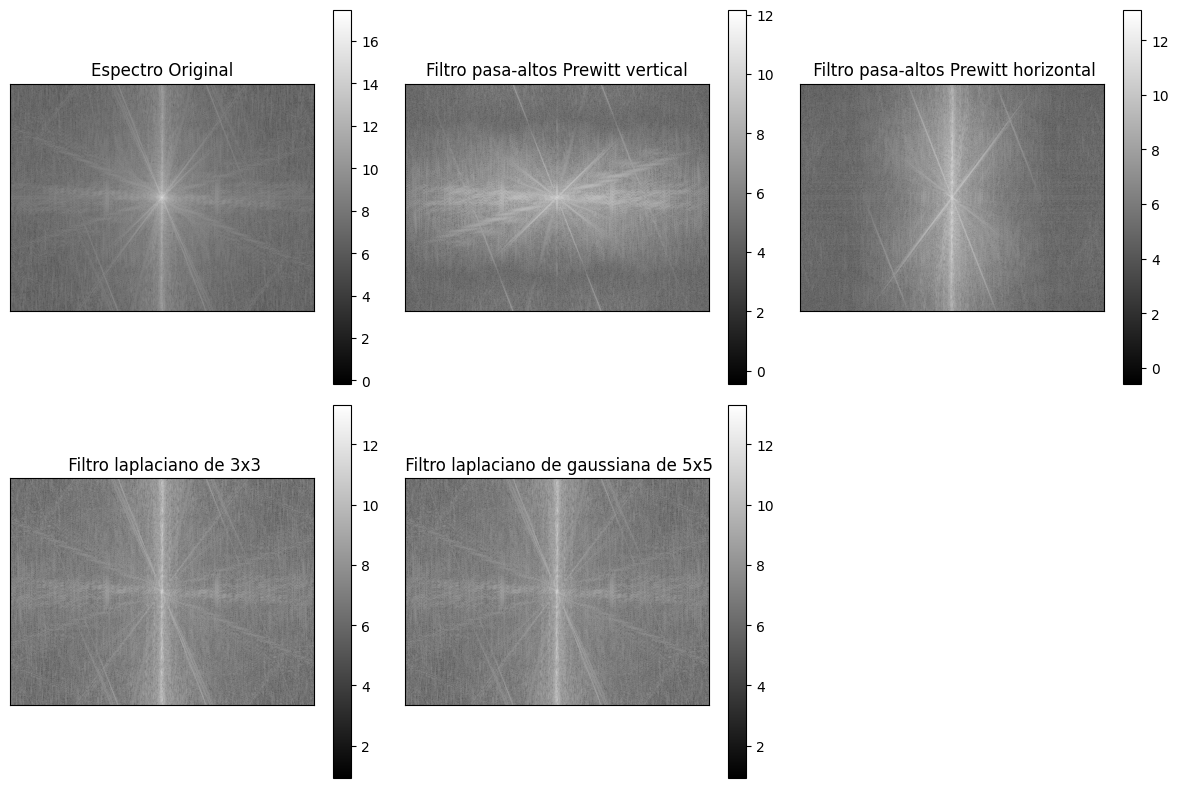

In [37]:
# Graficar espectros
plt.figure(figsize=(12, 8))
plt.subplot(231), plt.imshow(espectro_original[0], cmap='gray')
plt.title(espectro_original[1]), plt.xticks([]), plt.yticks([])
plt.colorbar()  # Añadir barra lateral para el espectro
plt.subplot(232), plt.imshow(espectro_prewitt_vertical[0], cmap='gray')
plt.title(espectro_prewitt_vertical[1]), plt.xticks([]), plt.yticks([])
plt.colorbar()  # Añadir barra lateral para el espectro
plt.subplot(233), plt.imshow(espectro_prewitt_horizontal[0], cmap='gray')
plt.title(espectro_prewitt_horizontal[1]), plt.xticks([]), plt.yticks([])
plt.colorbar()  # Añadir barra lateral para el espectro
plt.subplot(234), plt.imshow(espectro_laplaciano[0], cmap='gray')
plt.title(espectro_laplaciano[1]), plt.xticks([]), plt.yticks([])
plt.colorbar()  # Añadir barra lateral para el espectro
plt.subplot(235), plt.imshow(espectro_laplaciano_gaussiana[0], cmap='gray')
plt.title(espectro_laplaciano_gaussiana[1]), plt.xticks([]), plt.yticks([])
plt.colorbar()  # Añadir barra lateral para el espectro
plt.tight_layout()
plt.show()

## P2 a)

In [38]:
def convertir_espacios_color(imagen):
    # Convertir la imagen a espacios de color RB, HSV y CIELAB
    imagen_RGB = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
    imagen_lab = cv2.cvtColor(imagen, cv2.COLOR_BGR2LAB)

    return imagen_RGB, imagen_hsv, imagen_lab

array([[[204, 113,  97],
        [204, 113,  97],
        [204, 113,  97],
        ...,
        [204, 113,  97],
        [204, 113,  97],
        [204, 113,  97]],

       [[204, 113,  97],
        [204, 113,  97],
        [204, 113,  97],
        ...,
        [204, 113,  97],
        [204, 113,  97],
        [204, 113,  97]],

       [[204, 113,  97],
        [204, 113,  97],
        [204, 113,  97],
        ...,
        [204, 113,  97],
        [204, 113,  97],
        [204, 113,  97]],

       ...,

       [[ 54, 127, 133],
        [ 54, 127, 133],
        [ 54, 127, 133],
        ...,
        [ 27, 128, 133],
        [ 28, 128, 132],
        [ 30, 128, 132]],

       [[ 54, 127, 133],
        [ 54, 127, 133],
        [ 54, 127, 134],
        ...,
        [ 24, 128, 132],
        [ 25, 128, 132],
        [ 27, 126, 133]],

       [[ 54, 127, 134],
        [ 54, 127, 134],
        [ 54, 127, 134],
        ...,
        [ 24, 128, 132],
        [ 24, 128, 132],
        [ 25, 128, 132]]], dtype=uint8)
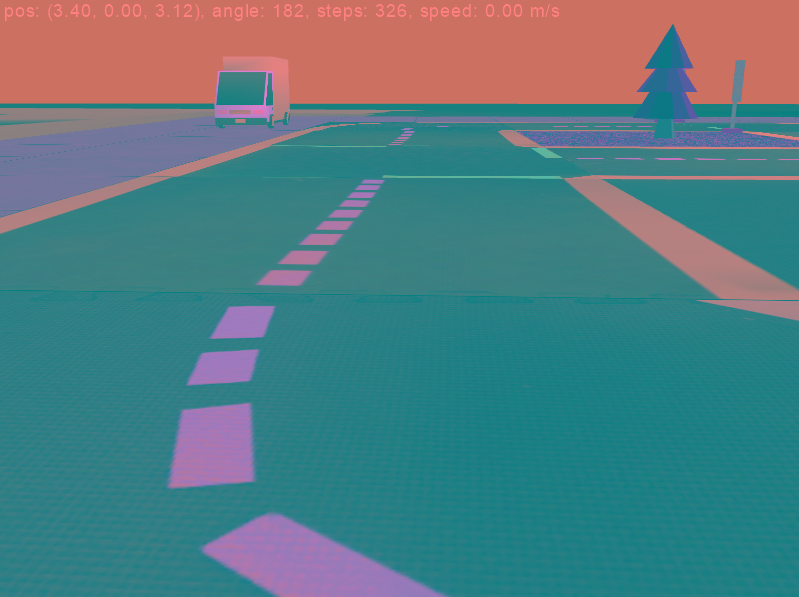

In [40]:
convertir_espacios_color(imagen_cv2)
A,B,C = convertir_espacios_color(imagen_cv2)
C